In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest
import seaborn as sns

In [2]:
#Importing checkpoint of plays by top 25 players in each position.
b = pd.read_csv('/Users/ianbury/Downloads/top_plays_data.csv')
b.head()

,Unnamed: 0,gsis_id,player_id,team,name_fixed,position,years_pro,height,weight,start_time,...,avg3_tar,avg5_tar,avg3_rush_att,avg5_rush_att,prev_tar,prev_rush_att,prev_pass_att,avg3_pass_att,avg5_pass_att,change_vs_last
0,1763,2017091003,00-0027793,PIT,A.Brown,WR,9.0,70.0,181.0,2017-09-10 17:00:00,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1777,2017091706,00-0027793,PIT,A.Brown,WR,9.0,70.0,181.0,2017-09-17 17:00:00,...,NaN,NaN,NaN,NaN,11.0,0.0,0.0,NaN,NaN,-15.0
2,1790,2017092403,00-0027793,PIT,A.Brown,WR,9.0,70.0,181.0,2017-09-24 17:00:00,...,NaN,NaN,NaN,NaN,11.0,0.0,0.0,NaN,NaN,13.3
3,1801,2017100102,00-0027793,PIT,A.Brown,WR,9.0,70.0,181.0,2017-10-01 17:00:00,...,12.000000,NaN,0.0,NaN,14.0,0.0,0.0,0.0,NaN,-16.6
4,1812,2017100807,00-0027793,PIT,A.Brown,WR,9.0,70.0,181.0,2017-10-08 17:00:00,...,11.333333,NaN,0.0,NaN,9.0,0.0,0.0,0.0,NaN,15.3


In [3]:
a = pd.read_csv('/Users/ianbury/Downloads/chckpt1.csv')

# Is the Thursday curse real?
Common practice says players typically perform worse on Thursday games, due to the shorter recovery week.

In [4]:
th = b[(b.day_of_week=='Thursday')][['fantasy_score']]
not_th = b[(b.day_of_week!='Thursday')][['fantasy_score']]
print (len(th))
print( len(not_th))

469
6296


In [5]:
print('Mean Score / StdDev - Thursday: '+str(np.mean(th.fantasy_score))+' / '+str(np.std(th.fantasy_score)))
print('Mean Score / StdDev - Rest of Week: '+str(np.mean(not_th.fantasy_score))+' / '+str(np.std(not_th.fantasy_score)))

Mean Score / StdDev - Thursday: 12.555010660980825 / 8.336908858019415
Mean Score / StdDev - Rest of Week: 12.760346251588272 / 8.329751903852163


In [6]:

import scipy.stats as st

In [7]:
ztest(th,not_th,0,alternative='smaller')

(array([-0.51490482]), array([0.30330977]))

In [8]:
def z_score(sample1,sample2):
    """This function returns a z-score and standard error in a tuple for a two sample z-test of means"""
    return ((np.mean(sample1)-np.mean(sample2)) / np.sqrt((np.std(sample1)**2)/len(sample1)+(np.std(sample2)**2)/len(sample2)),np.sqrt((np.std(sample1)**2)/len(sample1)+(np.std(sample2)**2)/len(sample2)))

In [9]:
#H(0): There is no difference in mean player performance between Thursday games and the rest of the week.
#H(a): Thursday games have lower player performance than the rest of the week.
#1-sided z-test, p=.05
z,se=z_score(th.fantasy_score,not_th.fantasy_score)
print('Z-score: '+str(z))
p_val = st.norm.cdf(z)
print('p='+str(p_val))
#We do not reject the null hypothesis; no significant difference in player performance on Thursdays.

ci = (np.mean(th.fantasy_score)-np.mean(not_th.fantasy_score))+np.array([-1,1])*1.96*se
print(ci)
#With 95% confidence, the actual difference in mean player performance between Thursday 
#and rest of the week is between -0.99 and 0.58

Z-score: -0.5146001354641899
p=0.3034162352160796
[-0.9874142   0.57674302]


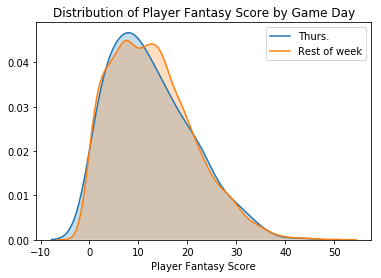

In [34]:
_=sns.distplot(th.fantasy_score,hist=False, norm_hist=True,hist_kws={'alpha':0.5},kde_kws={"shade": True},label='Thurs.')
_=sns.distplot(not_th.fantasy_score,hist=False, norm_hist=True,hist_kws={'alpha':0.5},kde_kws={"shade": True},label='Rest of week')
_=plt.xlabel('Player Fantasy Score')
_=plt.title('Distribution of Player Fantasy Score by Game Day')
_=plt.legend()

If the players' performance from a fantasy score perspective is unaffected, did this common sense arise from the final game scores?

In [10]:
games = a[['gsis_id','home_score','away_score','day_of_week']]

In [11]:
games=games.drop_duplicates()

In [12]:
games['total']=games['home_score']+games['away_score']
games=games[['total','day_of_week']]

In [20]:
g_th = games[(games.day_of_week=='Thursday')]
g_n = games[(games.day_of_week!='Thursday')]

In [14]:
print('Mean Score / StdDev - Thursday: '+str(np.mean(g_th.total))+' / '+str(np.std(g_th.total)))
print('Mean Score / StdDev - Rest of Week: '+str(np.mean(g_n.total))+' / '+str(np.std(g_n.total)))

Mean Score / StdDev - Thursday: 43.83458646616541 / 14.250804198981601
Mean Score / StdDev - Rest of Week: 44.89267618608936 / 13.777798306939863


In [15]:
#Bootstrapping - 2 sample, difference of means
#H(0): No difference in total score
#H(a): Thursday games have lower total scores
n_th = len(g_th)
print('Number of Thurs. games: '+str(n_th)+', mean: '+str(np.mean(g_th.total)))
n_n = len(g_n)
print('Number of non-Thurs. games: '+str(n_n)+', mean: '+str(np.mean(g_n.total)))
b = np.concatenate((g_th.total,g_n.total))
print('mean_all: '+str(np.mean(b)))


Number of Thurs. games: 133, mean: 43.83458646616541
Number of non-Thurs. games: 2171, mean: 44.89267618608936
mean_all: 44.83159722222222


In [16]:
diff_means = np.mean(g_th.total)-np.mean(g_n.total)

p_diffs = np.empty(10000)

for i in range(10000):
    scrambled = np.random.permutation(b)
    th_scrambled = scrambled[:133]
    n_scrambled = scrambled[133:]
    p_diffs[i] = np.mean(th_scrambled)-np.mean(n_scrambled)


p = np.sum(p_diffs<=diff_means)/len(p_diffs)
print( 'p-value: '+str(p))

p-value: 0.1896


Again, we fail to reject the null hypothesis; we can't say that Thursday games have a lower total score on average.

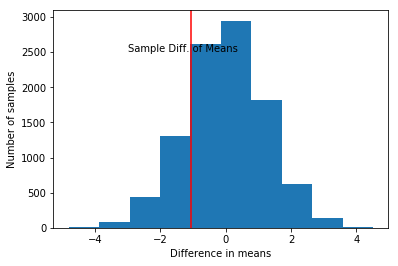

In [17]:
_=plt.hist(p_diffs)
_=plt.xlabel('Difference in means')
_=plt.ylabel('Number of samples')
_=plt.axvline(x=diff_means,c='r')
_=plt.annotate(xy=(-3,2500),s='Sample Diff. of Means')

# Weather and Quarterbacks

In [18]:
g=b[(b.position=='QB')&(b['desc_simple']=='Windy')]['fantasy_score']
n=b[(b.position=='QB')&(b['desc_simple']!='Windy')]['fantasy_score']
print(ztest(g,n,0,'smaller'))
print(np.mean(n))
print(np.mean(g))

AttributeError: 'numpy.ndarray' object has no attribute 'position'

In [ ]:
sns.distplot(g,hist=False,  kde_kws={"shade": True},label='Windy')
sns.distplot(n,hist=False,  kde_kws={"shade": True},label='Not_Windy')
plt.title('QBs in Windy Weather')

In [ ]:


g=b[(b.position=='QB')&(b['desc_simple']=='Good')]['fantasy_score']
n=b[(b.position=='QB')&(b['desc_simple']!='Good')]['fantasy_score']
print(ztest(g,n,0,'larger'))
print(np.mean(n))
print(np.mean(g))

In [ ]:
sns.distplot(g,hist=False,  kde_kws={"shade": True},label='Good')
sns.distplot(n,hist=False,  kde_kws={"shade": True},label='Not_Good')
plt.title('QBs in Good Weather')